# Analyzing and Quantifying Uncertainty

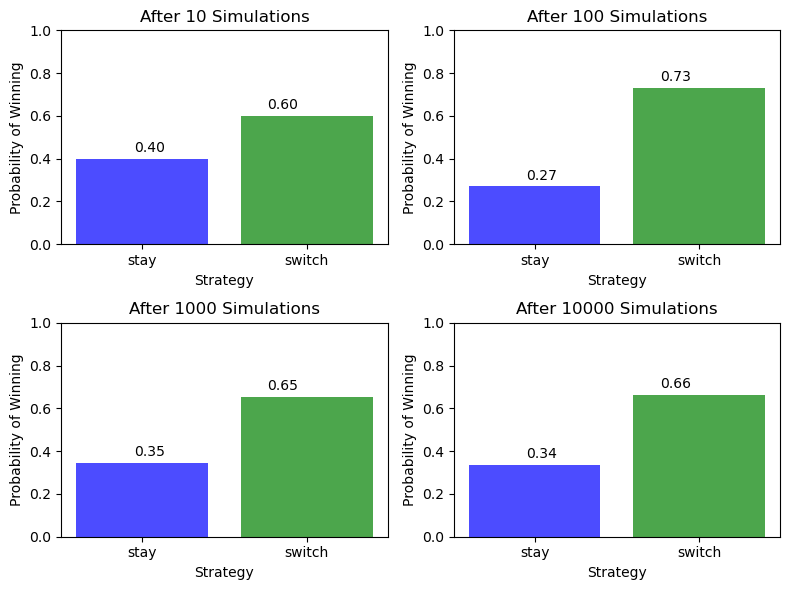

In [1]:
import random
import matplotlib.pyplot as plt

# Number of iterations in the simulation
number_of_iterations = [10, 100, 1000, 10000]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

for i, number_of_iterations in enumerate(number_of_iterations):
    # List to store results of all iterations
    stay_results = []
    switch_results = []

    # For loop for collecting results
    for j in range(number_of_iterations):
        doors = ['door 1', 'door 2', 'door 3']

        # Random selection of door to place the car
        car_door = random.choice(doors)
        # You select a door at random
        your_door = random.choice(doors)

        # Monty can only select the door that does not have the car and one  
        # that you have not chosen
        monty_door = list(set(doors) - set([car_door, your_door]))[0]
        # The door that Monty does not open and the one you have 
        # not chosen initially
        switch_door = list(set(doors) - set([monty_door, your_door]))[0]

        # Result if you stay with your original choice and it has the 
        # car behind it
        stay_results.append(your_door == car_door)
        # Result if you switch doors and it has the car behind it
        switch_results.append(switch_door == car_door)

    # Probability of winning the car if you stay with your original
    # choice of door
    probability_staying = sum(stay_results) / number_of_iterations
    # Probability of winning the car if you switch doors
    probability_switching = sum(switch_results) / number_of_iterations

    ax = axs[i // 2, i % 2]

    # Plot the probabilities as a bar graph
    ax.bar(['stay', 'switch'], [probability_staying, probability_switching],
    color=['blue', 'green'], alpha=0.7)
    ax.set_xlabel('Strategy')
    ax.set_ylabel('Probability of Winning')
    ax.set_title('After {} Simulations'.format(number_of_iterations))
    ax.set_ylim([0, 1])

    # Add probability values on the bars
    ax.text(-0.05, probability_staying + 0.05, '{:.2f}'
    .format(probability_staying), ha='left', va='center', fontsize=10)
    ax.text(0.95, probability_switching + 0.05, '{:.2f}'
    .format(probability_switching), ha='right', va='center', fontsize=10)

plt.tight_layout()
plt.show()

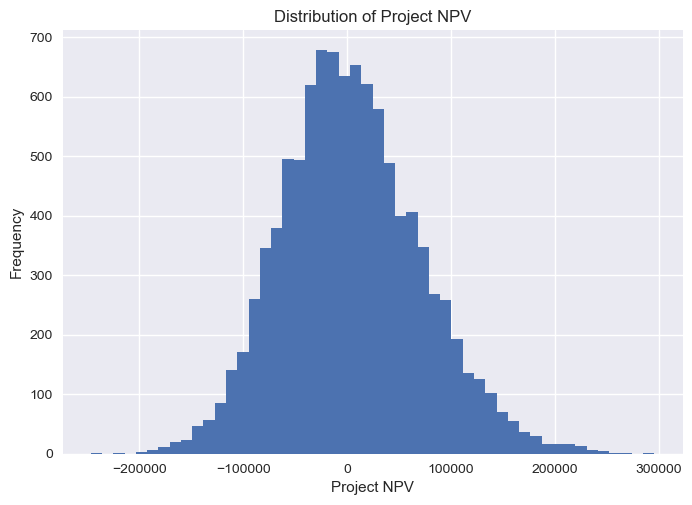

            NPV
count   10000.0
mean     4428.0
std     67384.0
min   -246807.0
25%    -41389.0
50%       454.0
75%     46609.0
max    295920.0
There is a 50% probability that the project will have a positive NPV.


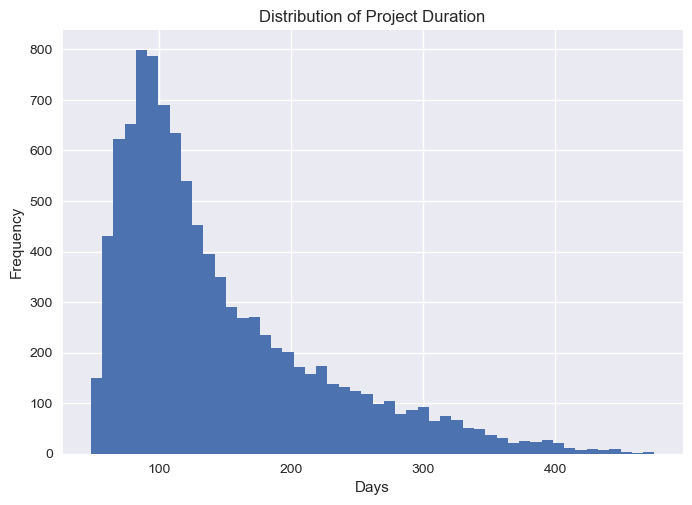

          Days
count  10000.0
mean     146.0
std       77.0
min       48.0
25%       90.0
50%      120.0
75%      182.0
max      475.0


In [2]:
# Import key Python libraries and packages that we need to process and analyze 
# our data
import pandas as pd
from datetime import datetime
import numpy as np
from numpy import random as npr
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

# Specify model constants per full-time equivalent (fte)
daily_rate = 400
technology_charges = 500
overhead_charges = 200

# Specify other constants
tax_rate = 0.15

# Specify model risk factors that have little or no correlation among them.
# Number of trials/simulations
n = 10000
# Number of full-time equivalent persons on the team
fte = npr.uniform(low=1, high=5, size=n)
# In person days and driven independently by the scope of the project
effort = npr.uniform(low=240, high=480, size=n)
# Based on market research or expert judgment or both
price = npr.uniform(low=100, high=200, size=n)
# Independent of price in the price range considered
units = npr.normal(loc=1000, scale=500, size=n)
# Discount rate for the project period based on risk of similar efforts 
discount_rate = npr.uniform(low=0.06, high=0.10, size=n)

# Specify how risk factors affect the project model
labor_costs = effort * daily_rate
technology_costs = fte * technology_charges
overhead_costs = fte * overhead_charges
revenues = price * units
# Duration determines the number of days the project will take to complete
# assuming no interruption. Different from the elapsed time of the project.
duration = effort/fte

# Specify target_value
free_cash_flow = (revenues - labor_costs - technology_costs - overhead_costs) * (1 - tax_rate)

# Simulate project NPV assuming initial FCF=0
npv = free_cash_flow/(1 + discount_rate)

# Convert numpy array to pandas DataFrame for easier analysis
NPV = pd.DataFrame(npv, columns=['NPV'])
# Estimate project duration in days
Duration = pd.DataFrame(duration, columns=['Days'])

# Plot histogram of NPV distribution
plt.hist(NPV['NPV'], bins=50), plt.title ('Distribution of Project NPV'), 
plt.xlabel('Project NPV'), 
plt.ylabel('Frequency'), plt.show();
print(NPV.describe().round())
success_probability = sum(NPV['NPV'] > 0)/n *100
print('There is a {0}% probability that the project will have a positive NPV.'
.format(round(success_probability)))
# Plot histogram of project duration distribution
plt.hist(Duration['Days'], bins=50), 
plt.title ('Distribution of Project Duration'), plt.xlabel('Days'), 
plt.ylabel('Frequency'), plt.show();
print(Duration.describe().round())